# Predicting with Neural Networks

### Fill the parts with X

## Python Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

%matplotlib inline  

## Data Imports

### DEFINE THE PATH TO YOUR COURSE DIRECTORY

In [5]:
data_dir = "/home/mathias/bioinfo_algos/data/"

### define run time parameters

In [6]:
# Define if we are using blosum or sparse encoding
blosum_scheme = False
#blosum_scheme = True

### Alphabet

In [7]:
alphabet_file = data_dir + "Matrices/alphabet"
#alphabet_file = "https://raw.githubusercontent.com/brunoalvarez89/data/master/algorithms_in_bioinformatics/part_3/alphabet"
alphabet = np.loadtxt(alphabet_file, dtype=str)

### Blosum50 Encoding Scheme

In [9]:
blosum_file = data_dir + "Matrices/BLOSUM50"
#blosum_file = "https://raw.githubusercontent.com/brunoalvarez89/data/master/algorithms_in_bioinformatics/part_3/blosum50"

_blosum50 = np.loadtxt(blosum_file, dtype=float).reshape((24, -1)).T

blosum50 = {}

for i, letter_1 in enumerate(alphabet):
    
    blosum50[letter_1] = {}

    for j, letter_2 in enumerate(alphabet):
        
        blosum50[letter_1][letter_2] = _blosum50[i, j] / 5.0

### Sparse Encoding Scheme

In [10]:
sparse_file = data_dir + "Matrices/sparse"

_sparse = np.loadtxt(sparse_file, dtype=float)
sparse = {}

for i, letter_1 in enumerate(alphabet):

    sparse[letter_1] = {}

    for j, letter_2 in enumerate(alphabet):

        sparse[letter_1][letter_2] = _sparse[i, j]

## Peptide Encoding

In [11]:
def encode(peptides, encoding_scheme, alphabet):
    
    encoded_peptides = []

    for peptide in peptides:

        encoded_peptide = []

        for peptide_letter in peptide:

            for alphabet_letter in alphabet:

                encoded_peptide.append(encoding_scheme[peptide_letter][alphabet_letter])
        
        # add a 1 (bias)
        encoded_peptide.append(1)
        
        # store peptide
        encoded_peptides.append(encoded_peptide)
        
    return np.array(encoded_peptides)

## Neural Network Functions

### Activation (Sigmoid)

In [12]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

### Forward Propagation

In [14]:
def forward(X, w1, w2):
    
    # X contains the output from each layer, i.e the input values in the first layer
    # w1 are weights connecting input to hidden, and w2 weights connecting hidden to output
    # In w[i,j]; i is from and j is to
   
    # get dimension, substracting the bias
    input_layer_dim = w1.shape[0] - 1 
    hidden_layer_dim = w2.shape[0] - 1
    
    ################
    # hidden layer #
    ################
    
    # activity of hidden layer
    # Remember z_j = sum_i w(i,j)*input(i)
    for j in range(hidden_layer_dim):
        z = 0.0
        for i in range(input_layer_dim+1):
            z += w1[i,j]*X[0][i]
        X[1][j] = sigmoid(z)
    
    ################
    # output layer #
    ################
    
    z = 0
    for i in range(hidden_layer_dim+1):
        z += w2[i,0]*X[1][i]
    X[2][0] = sigmoid(z)


## Prediction Data

In [15]:
evaluation_file = data_dir + "ANN/A2403_evaluation"
#evaluation_file = data_dir + "ANN/A0201_evaluation"
evaluation_data = np.loadtxt(evaluation_file, dtype=str)

peptides = evaluation_data[:, 0]
if blosum_scheme:
    x_eval = encode(peptides, blosum50, alphabet)
else:
    x_eval = encode(peptides, sparse, alphabet)

y_eval = np.array(evaluation_data[:, 1], dtype=float)

## Function to load previously saved Network

In [16]:
def load_network(file_name):

    f = open(file_name, "r")

    n_line = 0

    weight_list = []

    for line in f:


        # clean and separate line
        sline = line.strip().split()


        # input layer dimension
        if n_line == 1:
            input_layer_dim = int(sline[0])

        # hidden layer dimension    
        if n_line == 2:
            hidden_layer_dim = int(sline[0])

        # output layer dimension
        if n_line == 3:
            output_layer_dim = int(sline[0])

        # model weights
        if n_line >= 5:
            for i in range(0, len(sline)):
                weight_list.append(float(sline[i]))

        n_line += 1

    # HIDDEN LAYER WEIGHTS
    # w_h[i, j] is the weight that links input's feature "i" to neuron "j" of the hidden layer        
    w_h_load = np.zeros(shape=(input_layer_dim+1, hidden_layer_dim))

    for i in range(0, (input_layer_dim+1)*hidden_layer_dim, hidden_layer_dim):

        for j in range(0, hidden_layer_dim):

            row = i // hidden_layer_dim

            w_h_load[row, j] = weight_list[i+j]

            
    # OUTPUT LAYER WEIGHTS
    # w_o[i, j] is the weight that links hidden layer's neuron "i" to neuron "j" of the output layer
    w_o_load = np.zeros(shape=(hidden_layer_dim+1, output_layer_dim))

    w_h_end = (input_layer_dim+1) * hidden_layer_dim

    for i in range(w_h_end, w_h_end+hidden_layer_dim+1, output_layer_dim):

        for j in range(0, output_layer_dim):

            row = (i - w_h_end) // output_layer_dim
            w_o_load[row, j] = weight_list[i+j]
            
            
    # return weight matrices
    return w_h_load, w_o_load

## Main code

FYKRKAMAW 0.975751 0.2811105678718654
QYPAFVLFI 0.93971 0.35780630788345785
ATQPVHWFL 0.862229 0.33407720822560555
YMTLQAVTF 0.765097 0.3606797887344793
EHFYWGSVF 0.467336 0.2601542932692888
YATVAGHEG 0.372063 0.16652812715882628
RAPKVRLSL 0.333416 0.23073430143862092
AYSPFAFKK 0.280552 0.38021410844175835
TYYPQVVLG 0.25393 0.3758769503014946
YRKPSGGVF 0.216913 0.34274981587573644
DPSMLRTTA 0.212813 0.09036252416402728
FPGEKRVSK 0.20429 0.08842412103926106
ASDPSFPDI 0.181359 0.24566066134173434
TYIGSLPGK 0.167029 0.2357915461748339
PPQATAKYL 0.151961 0.17166282610944777
IPRQWHPFA 0.142964 0.1208462019293711
NMLREGLSP 0.127993 0.19307715546555113
VLLGRLNKC 0.117982 0.2331001325564285
YTFCRLNVK 0.084687 0.17018195717455667
YIFWIRTPR 0.084687 0.12591959868498773
WSFLEDRVY 0.084687 0.10081329036600291
VYERQPCWY 0.084687 0.2824944155504988
VTRQIHNPR 0.084687 0.1373160539620639
VMTEGRHAV 0.084687 0.13505378064523782
VKKLWGHLP 0.084687 0.19255940260450807
TTRAWFDKK 0.084687 0.1406287757428253

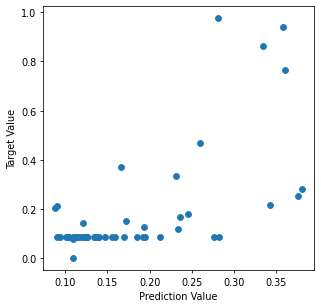

In [18]:
# Load network
synfile_name = data_dir + "ANN/A2403_sp.syn"
# synfile_name = data_dir + "ANN/A2403_bl.syn"
# synfile_name = data_dir + "ANN/A0201_sp.syn"
# synfile_name = data_dir + "ANN/A0201_bl.syn"
w_h, w_o = load_network(synfile_name)

# X matrix 
input_layer_dim = w_h.shape[0]
hidden_layer_dim = w_o.shape[0]
output_layer_dim = w_o.shape[1]

# Find max network dimensions
X_dim = max(input_layer_dim, hidden_layer_dim, output_layer_dim)
X = np.zeros(shape=(3, X_dim))

# The last column in each X layer is set to 1 to deal with the bias weights
X[0][input_layer_dim-1] = 1.0 
X[1][hidden_layer_dim-1] = 1.0
    
# data for plotting
y_preds_eval = []

# loop
for i in range(0, len(x_eval)):        

    # fetch training point
    x = x_eval[i]
    y = y_eval[i]

    if len(x) == input_layer_dim:
        
        X[0] = x

        # forward propagation
        forward(X, w_h, w_o)
        y_pred = X[2][0]
        
        y_preds_eval.append(y_pred)
        
        print(peptides[i], y, y_pred)
    else:
        print("Error. Peptide length", len(x),"does not match network sizs", input_layer_dim, "Skip")

# store training performance
eval_perf = pearsonr(y_eval, np.asarray(y_preds_eval))[0]

# PERFORMANCE REPORT
fig = plt.figure(figsize=(5, 5), dpi = 70)

plt.scatter(y_preds_eval, y_eval)
plt.ylabel("Target Value", fontsize=10);
plt.xlabel("Prediction Value", fontsize=10);

# print performance
print("# Prediction PCC:", round(eval_perf, 4))